<a href="https://colab.research.google.com/github/mazenbuk/intern/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.github.com/mazenbuk/intern/main/cancer%20patient%20data%20sets.csv')

In [3]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
data = data.drop(columns=['index', 'Patient Id'], axis=1)

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [6]:
Xtrain = train.drop(columns=['Level'], axis=1)
ytrain = train['Level']

Xtest = test.drop(columns=['Level'], axis=1)
ytest = test['Level']

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(ytrain)
y_test = encoder.transform(ytest)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(Xtrain)
X_test = scaler.transform(Xtest)

In [9]:
!pip install lazypredict

In [10]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier( verbose=0, ignore_warnings=True, custom_metric=None)
models_train, predictions_train = clf.fit( X_train, X_train, y_train, y_train )
models_test, predictions_test = clf.fit( X_train, X_test, y_train, y_test )

 97%|█████████▋| 28/29 [00:01<00:00, 16.24it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 23
[LightGBM] [Info] Start training from score -1.039165
[LightGBM] [Info] Start training from score -1.171183
[LightGBM] [Info] Start training from score -1.089900
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

100%|██████████| 29/29 [00:02<00:00, 12.93it/s]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 97%|█████████▋| 28/29 [00:01<00:00, 19.45it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 23
[LightGBM] [Info] Start training from score -1.039165
[LightGBM] [Info] Start training from score -1.171183
[LightGBM] [Info] Start training from score -1.089900
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

100%|██████████| 29/29 [00:01<00:00, 15.33it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [11]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,1.00,1.00,None,1.00,0.09
LabelPropagation,1.00,1.00,None,1.00,0.11
XGBClassifier,1.00,1.00,None,1.00,0.12
SVC,1.00,1.00,None,1.00,0.05
SGDClassifier,1.00,1.00,None,1.00,0.03
RandomForestClassifier,1.00,1.00,None,1.00,0.28
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.04
LogisticRegression,1.00,1.00,None,1.00,0.04
BaggingClassifier,1.00,1.00,None,1.00,0.05


In [12]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,1.00,1.00,None,1.00,0.06
LabelSpreading,1.00,1.00,None,1.00,0.12
XGBClassifier,1.00,1.00,None,1.00,0.08
SVC,1.00,1.00,None,1.00,0.06
SGDClassifier,1.00,1.00,None,1.00,0.05
RandomForestClassifier,1.00,1.00,None,1.00,0.21
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.01
PassiveAggressiveClassifier,1.00,1.00,None,1.00,0.02
LogisticRegression,1.00,1.00,None,1.00,0.05


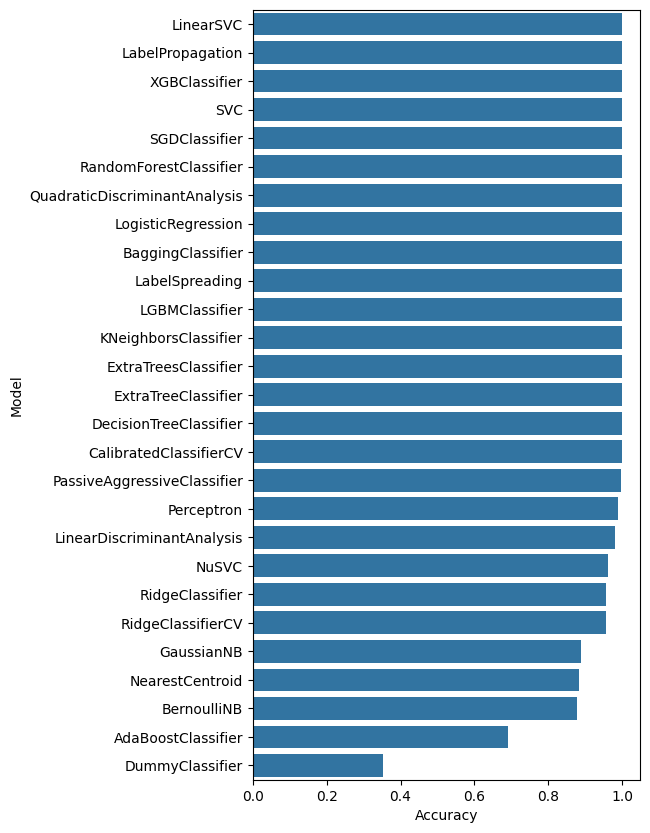

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 10))
ax = sns.barplot(y=models_train.index, x='Accuracy', data=models_train)

#Over Sampling

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [15]:
data = pd.read_csv('https://raw.github.com/mazenbuk/intern/main/cancer%20patient%20data%20sets.csv')

In [16]:
data_clean = data.drop(['index', 'Patient Id'], axis=1)

features = data_clean.iloc[:, :-1]
labels = data_clean.iloc[:, -1]

In [17]:
# Standard Scaling untuk fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [18]:
# Label Encoding untuk label
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels_encoded, test_size=0.2, random_state=42)

In [20]:
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [21]:
# Combine oversampled train set and test set to remove duplicates
combined_train = pd.DataFrame(X_train_oversampled, columns=features.columns)
combined_train['Level'] = y_train_oversampled

combined_test = pd.DataFrame(X_test, columns=features.columns)
combined_test['Level'] = y_test

combined = pd.concat([combined_train, combined_test]).drop_duplicates()

In [22]:
# Split again into features and labels
final_features = combined.iloc[:, :-1]
final_labels = combined.iloc[:, -1]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(final_features, final_labels, test_size=0.2, random_state=42)

In [24]:
from sklearn.model_selection import cross_val_score

def get_score(model, X, y):
    n = cross_val_score(model,X,y,scoring ='accuracy',cv=10)
    return n

#Lazy Classifier

In [25]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier( verbose=0, ignore_warnings=True, custom_metric=None)
models_train, predictions_train = clf.fit( X_train, X_train, y_train, y_train )
models_test, predictions_test = clf.fit( X_train, X_test, y_train, y_test )

100%|██████████| 29/29 [00:01<00:00, 21.83it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 23
[LightGBM] [Info] Start training from score -1.131402
[LightGBM] [Info] Start training from score -1.082612
[LightGBM] [Info] Start training from score -1.082612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:01<00:00, 14.87it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 23
[LightGBM] [Info] Start training from score -1.131402
[LightGBM] [Info] Start training from score -1.082612
[LightGBM] [Info] Start training from score -1.082612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [26]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,1.00,1.00,None,1.00,0.23
XGBClassifier,1.00,1.00,None,1.00,0.07
DecisionTreeClassifier,1.00,1.00,None,1.00,0.02
RandomForestClassifier,1.00,1.00,None,1.00,0.18
ExtraTreeClassifier,1.00,1.00,None,1.00,0.02
ExtraTreesClassifier,1.00,1.00,None,1.00,0.13
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.02
PassiveAggressiveClassifier,1.00,1.00,None,1.00,0.02
LabelPropagation,1.00,1.00,None,1.00,0.02


In [27]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,1.00,1.00,None,1.00,0.20
ExtraTreeClassifier,1.00,1.00,None,1.00,0.02
DecisionTreeClassifier,0.97,0.97,None,0.97,0.02
LabelPropagation,0.97,0.97,None,0.97,0.03
LabelSpreading,0.97,0.97,None,0.97,0.04
RandomForestClassifier,0.97,0.97,None,0.97,0.28
NuSVC,0.94,0.95,None,0.94,0.04
ExtraTreesClassifier,0.94,0.95,None,0.94,0.24
GaussianNB,0.94,0.95,None,0.94,0.03


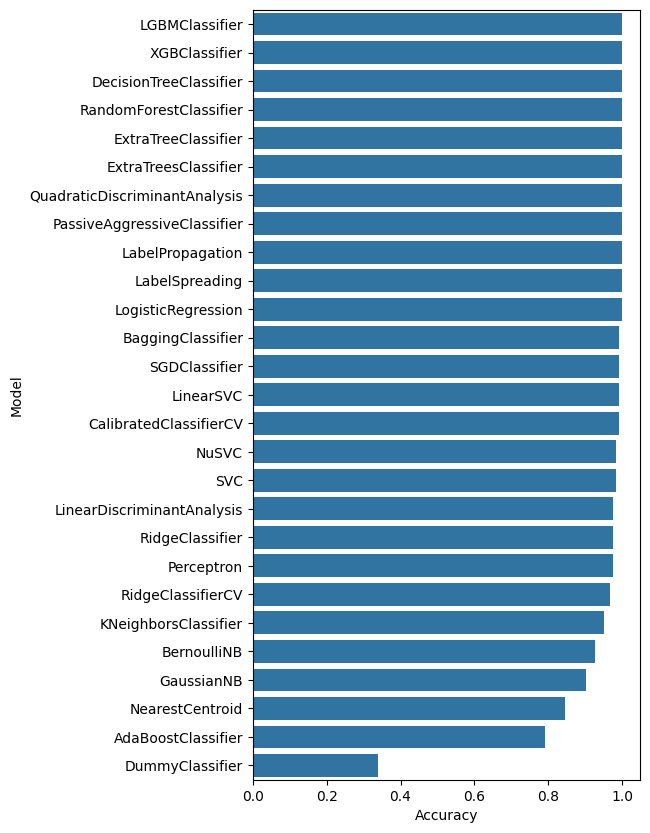

In [28]:
plt.figure(figsize=(5, 10))
ax = sns.barplot(y=models_train.index, x='Accuracy', data=models_train)

#Decision Tree

##No Tuning

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
dtc_score = get_score(dtc, X_test, y_test).mean()
print(dtc_score)

0.8999999999999998


##Tuning

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

print("Best parameters:", grid_search_dt.best_params_)
print("Best cross-validation score:", grid_search_dt.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9836666666666666


#Random Forest

##No Tuning

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
rfc_score = get_score(rfc, X_test, y_test).mean()
print(rfc_score)

0.8999999999999998


##Tuning

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation score:", grid_search_rf.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.9756666666666666


#XGBoost

##No Tuning

In [35]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [36]:
xgbc_score = get_score(xgbc, X_test, y_test).mean()
print(xgbc_score)

0.8999999999999998


##Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}

grid_search_xgb = GridSearchCV(estimator=xgbc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

print("Best parameters:", grid_search_xgb.best_params_)
print("Best cross-validation score:", grid_search_xgb.best_score_)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


KeyboardInterrupt: 

#Logistic Regression

##No Tuning

In [40]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(solver='liblinear') #For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
lrc.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [41]:
lrc_score = get_score(lrc, X_test, y_test).mean()
print(lrc_score)

0.9083333333333332


#Tuning

In [42]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.2, 0.5, 0.8]
}

grid_search_lr = GridSearchCV(estimator=lrc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

print("Best parameters:", grid_search_lr.best_params_)
print("Best cross-validation score:", grid_search_lr.best_score_)

Best parameters: {'C': 10, 'l1_ratio': 0.2, 'penalty': 'l1'}
Best cross-validation score: 0.9756666666666666


#SVM

#No Tuning

In [43]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [44]:
svc_score = get_score(svc, X_test, y_test).mean()
print(svc_score)

0.8749999999999998


##Tuning

In [45]:
param_grid = {
    'C': [0.1, 1, 10],  # Eksplor nilai C yang lebih rendah hingga lebih tinggi
    'kernel': ['linear', 'rbf'],  # Pertimbangkan linear dan RBF untuk kesederhanaan
    'gamma': ['scale', 'auto', 0.1, 1],  # Eksplorasi nilai gamma untuk kernel RBF
}

grid_search_svm = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search_svm.fit(X_train, y_train)


print("Best parameters:", grid_search_svm.best_params_)
print("Best cross-validation score:", grid_search_svm.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.9596666666666666


#KNN

#No Tuning

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
knc_score = get_score(knc, X_test, y_test).mean()
print(knc_score)

0.8749999999999998


##Tuning

In [49]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(estimator=knc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)


print("Best parameters:", grid_search_knn.best_params_)
print("Best cross-validation score:", grid_search_knn.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best cross-validation score: 0.9676666666666666
